## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [27]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [28]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

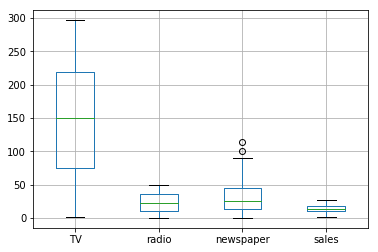

In [29]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [30]:

#plt.scatter(Fill_this_in)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


C:\Users\Classic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


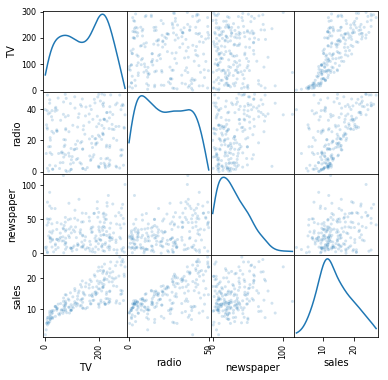

In [32]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df,alpha=0.2,figsize=(6,6),diagonal='kde')
#scatter_matrix(df,figsize=(8,8))
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

No corelation between any two of them. But TV and radio are somehow related to sales. explanation is as below: looking at the correlation parameter, r of "TV & sales", "radio & sales" are greater than other r, and are all > 0.55.

In [33]:
# calculating r to see the correlation between them
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [34]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [35]:
# Code here
y = df['sales']

b) Set X to be just the features described above in df

In [36]:
# Code here
X = df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [37]:
# Code here
# Split the data into training/testing sets
size = float(len(X))
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [38]:
# Code here
regr = LinearRegression()
# Split the data into training/testing sets
size = float(len(X))
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]
# Train the model using the training sets
regr.fit(X_train, y_train)
print('Coefficients: \n', regr.coef_)
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
Residual sum of squares: 2.79


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

R^2 = 1 means perfect prediction. The result shows that R^2 =0.9, very high, it is good.

In [39]:
# Code here
print('R^2 Score: %.2f' % regr.score(X_test, y_test))

R^2 Score: 0.90


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

It is a good matching model. The line fits the scatter plot well.

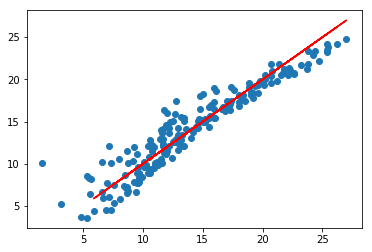

In [40]:
# Code here
plt.scatter(y,regr.predict(X))
plt.plot(y_test,y_test,'r')

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

Before measure the features, we need to standardize(normalize) to ensure each feature has mean zero and unit variance.

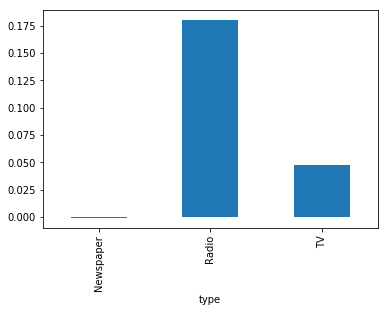

In [41]:
# Code/explanation here

#Before measure the features, we need to standardize(normalize) to ensure each feature has mean zero and unit variance.

# first, let's see what happen if I don't normalize:
regr.coef_
df = pd.DataFrame({'type':['TV','Radio','Newspaper'], 'coef':regr.coef_})

df.groupby('type')['coef'].mean().plot(kind='bar')

# the result as follow is not reasonable.

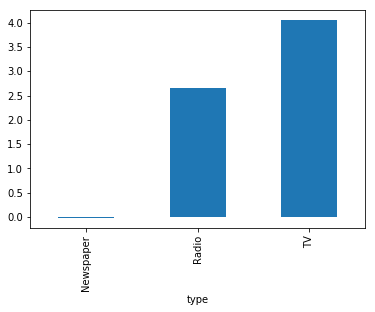

In [42]:
# so let's normalize the feature:

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X2 = X.as_matrix().astype(np.float)
X2 = scaler.fit_transform(X)

size = float(len(X2))
X_train = X2[0:int(size*0.8)]
X_test = X2[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

regr.coef_
df = pd.DataFrame({'type':['TV','Radio','Newspaper'], 'coef':regr.coef_})

df.groupby('type')['coef'].mean().plot(kind='bar')

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

From (g), it shows that TV has more significant impact than any others. We need to standardize(normalize) to ensure each feature has mean zero and unit variance before measure the features.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

C:\Users\Classic\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


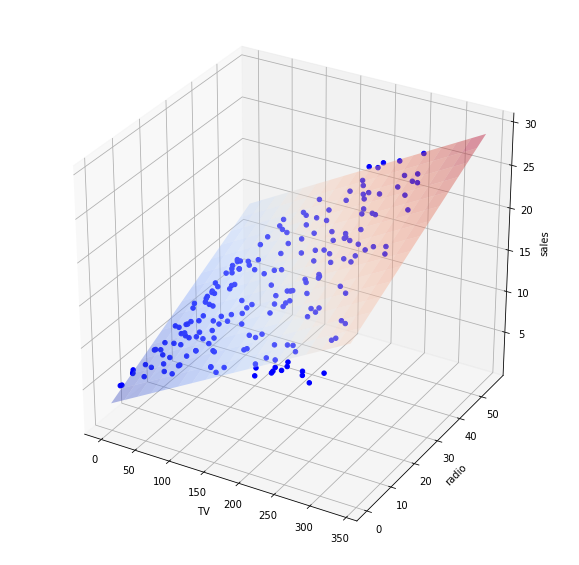

In [43]:
# Type your answer here. 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()

In image above, there is nonlinear interaction. So try to use nonlinear one.

Coefficients: 
 [ 0.01918396  0.02648516  0.00109794]
Residual sum of squares: 0.39
Variance score: 0.99


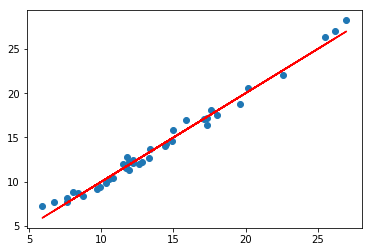

In [23]:
X['TV*radio']=X['TV']*X['radio']
X = X.drop(['newspaper'],1)
size = float(len(X))

X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the targets into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
plt.scatter(y_test,regr.predict(X_test))
plt.plot(y_test,y_test,color='r')

The performance has improved. We plotted the results to obtain some intuition about the data and observed some non-linear interactions present.

C:\Users\Classic\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


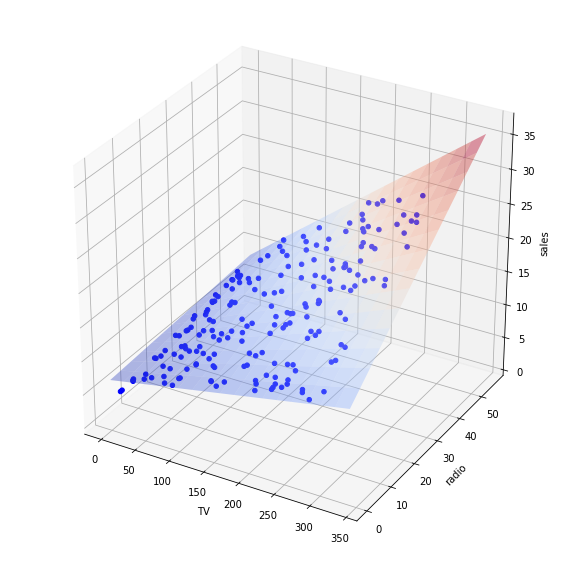

In [44]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Create a linear OLS model with TV:Radio interaction term 
# such that Sales = beta_0 + beta_1 * TV + beta_2 * Radio + beta_3 * Radio * TV
model = sm.ols(formula='sales ~ TV * radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20) 
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)

# Create surface plot
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

# Create scatter plot
ax.scatter(csv['TV'], csv['radio'], csv['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

# Print results
plt.show()

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


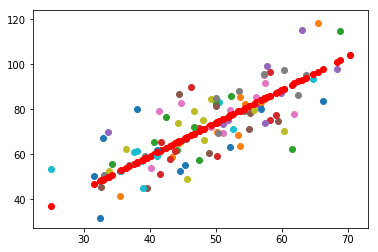

In [51]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]
errors = []

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ('Running...')
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


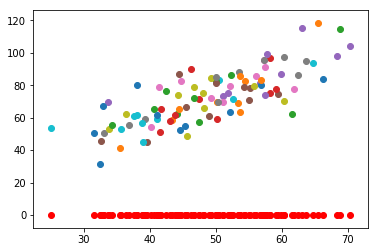

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


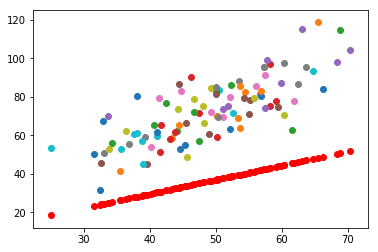

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


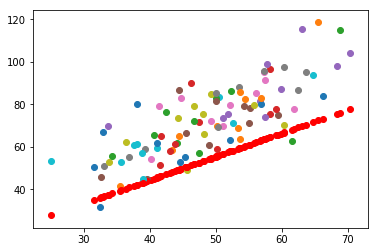

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


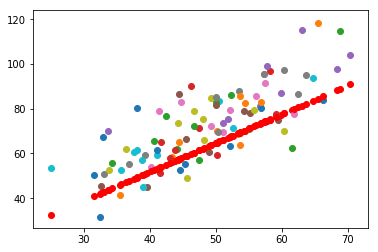

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


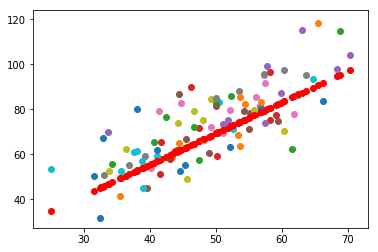

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


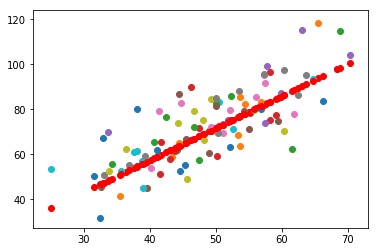

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


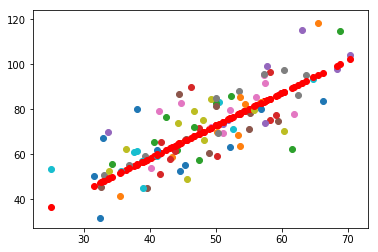

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


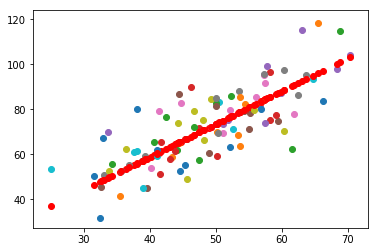

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


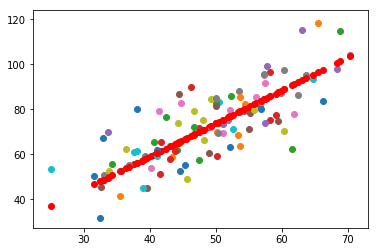

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


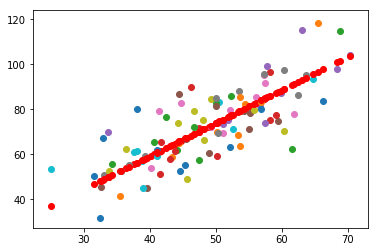

In [52]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()

Plotting the errors after a few iterionats of gradient descent for various learning rates, and see how it affects convergence to the solution.

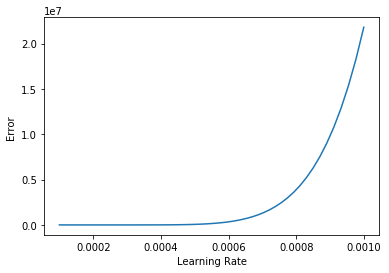

In [56]:
import numpy as np
points = np.genfromtxt("../data/data.csv", delimiter=",")

initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 3
#print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
#print "Running..."
errors=[]
learning_rates = np.logspace(-4,-3,100)

for l in learning_rates:
    learning_rate = l
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Learning Rate')
plt.ylabel('Error ')

plt.plot(learning_rates,errors,label='num_iterations='+str(num_iterations))


Taken from Alex Lauro's solutions:
In the four cases above, we show the effects of modifying the learning rate parameter on the convergence or divergence of the gradient descent method. The following table summarizes the results:
case 1: somewhat fast convergence,learning rate=0.00005,error after 10 iterations=143.99
case 2: fast convergence, learning rate=0.0001,error after 10 iterations=112.67
case 3: slow convergence, learning rate=0.0004,error after 10 iterations=4964.62
case 4: divergence,learning rate=0.0004,error after 10 iterations=7312008.36

We see in Case 2 that the learning rate set to 0.0001 results in the fastest convergence as the absolute error between 10 and 100 iterations is on the order of 10^-2. Case 1, with the smaller learning rate of 0.00005, results in a less fast convergence since the absolute error is 31.34. Case 3, where the learning rate is 0.004, results in a slow convergence as the absolute error is 3360. Lastly, Case 4, where the learning rate is 0.0005, shows divergence from the solution as the error increases with each additional iteration. Thus, we infer that the optimal learning rate is closer to 0.0001. 

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

Result and explanation as above, and run the 3 types of learing rate as follow.

# Good learning rate

In [ ]:
run a learning rate of 0.0001 would be a good one based on the figure above

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


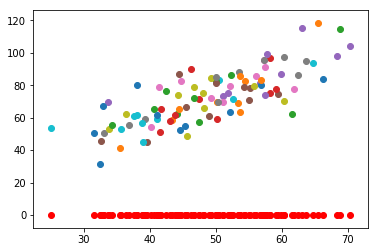

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


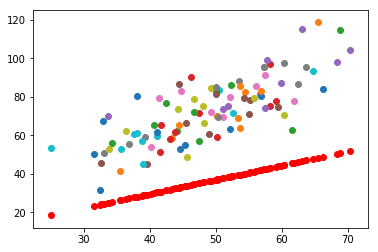

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


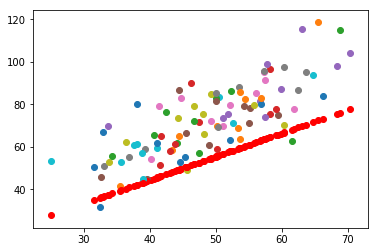

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


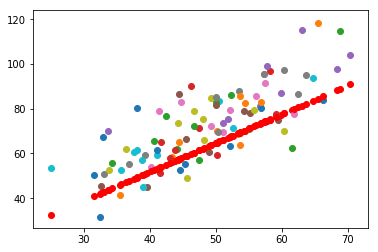

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


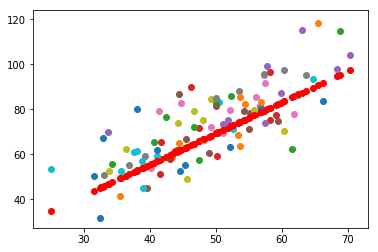

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


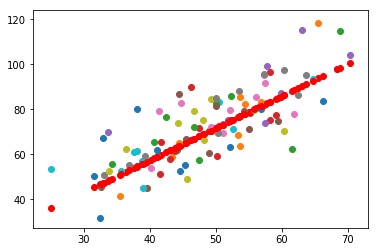

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


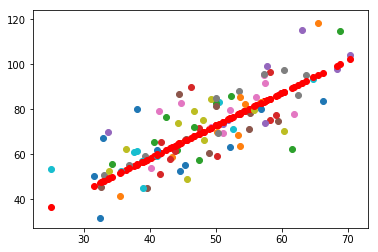

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


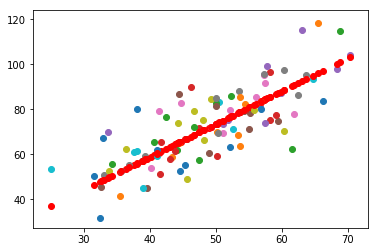

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


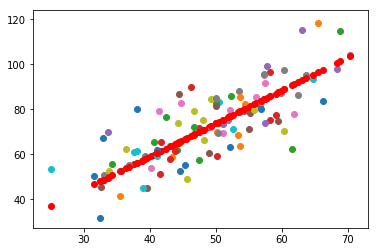

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


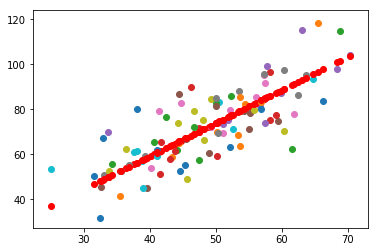

In [57]:
for num in range(0,10):
    run(num)
    plt.show()

# Bad learning rate 

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = -3.1165582062514995e+58, m = -1.585655822608489e+60, error = 6.267874454306815e+123
Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


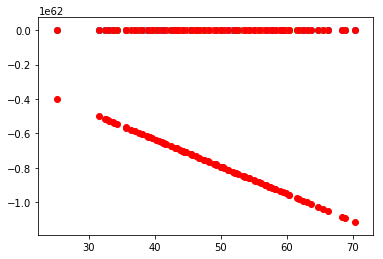

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 727.3505055368648, m = 36853.51486795526, error = 3385531039564.366


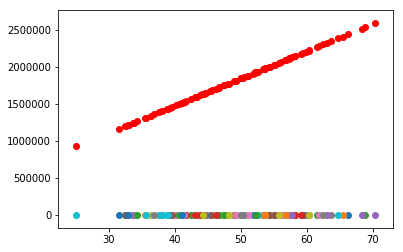

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -18048688.453684375, m = -918289143.8870015, error = 2.1021385526589548e+21


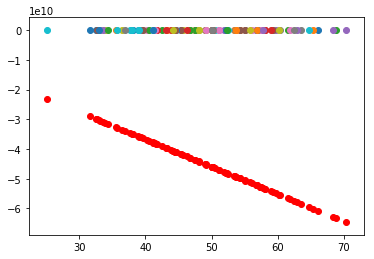

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 449741573592.06177, m = 22882144263992.85, error = 1.3052565293534628e+30


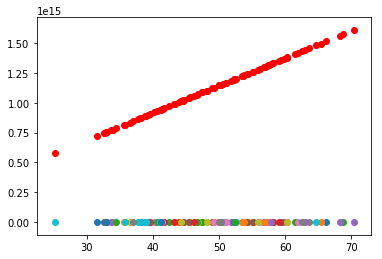

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -1.1206765996653838e+16, m = -5.701826367163635e+17, error = 8.104578098645673e+38


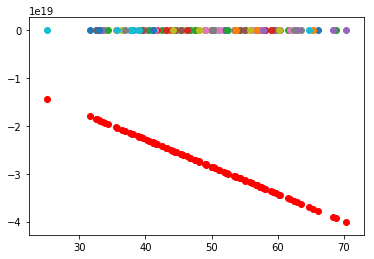

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 2.7925282313208968e+20, m = 1.420794465160468e+22, error = 5.03228175304227e+47


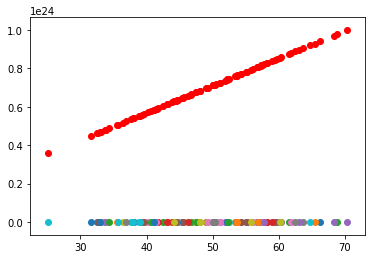

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -6.958487332610169e+24, m = -3.540368966434871e+26, error = 3.1246363886892505e+56


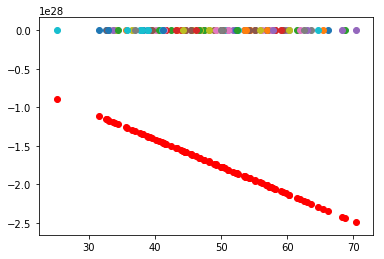

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 1.733932191446198e+29, m = 8.821974413504957e+30, error = 1.9401442607259725e+65


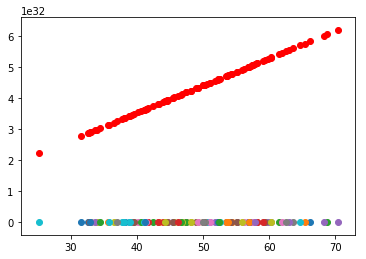

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -4.3206528959874556e+33, m = -2.1982802722086814e+35, error = 1.204671291051229e+74


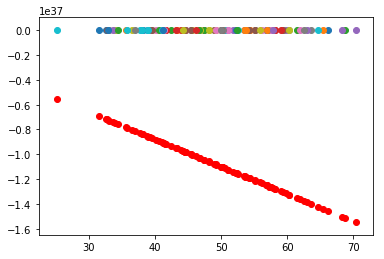

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 1.0766304207106617e+38, m = 5.477726332763135e+39, error = 7.480025835501557e+82


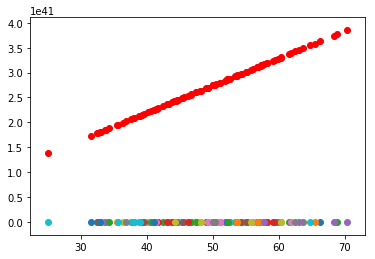

In [67]:
def runbad(num_iterations,learning_rate=0.001):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ('Running...')
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

runbad(100)

learning_rate = 5
for num in range(0,10):
    runbad(num,learning_rate)
    plt.show()

# Inefficient learning rate

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


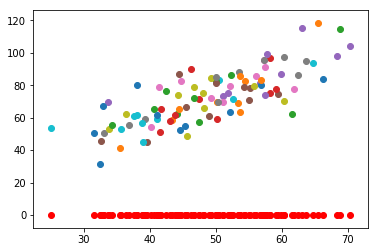

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0007273505055368648, m = 0.03685351486795526, error = 5296.751517883232


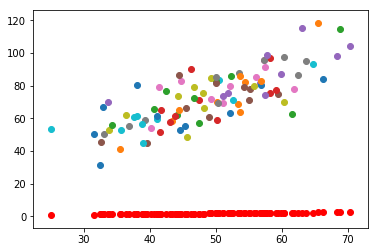

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0014366508679190342, m = 0.0727886668849938, error = 5041.603028410295


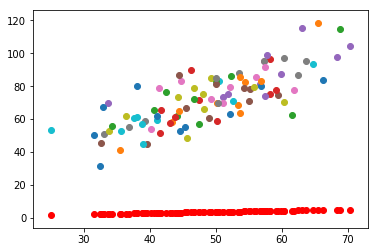

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.002128350882868347, m = 0.10782834095035759, error = 4799.012309822763


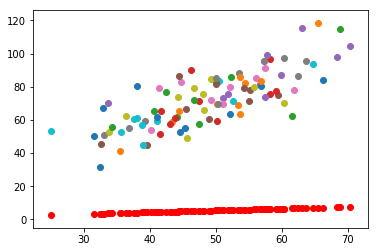

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.0028028891375415726, m = 0.1419948516891178, error = 4568.361300022541


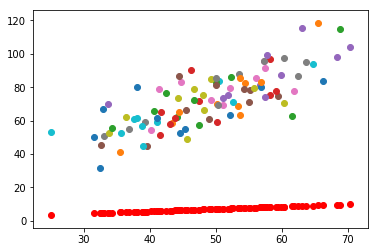

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.0034606932898392693, m = 0.17530995766297064, error = 4349.062356383331


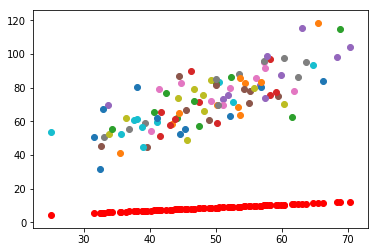

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.004102180340754483, m = 0.20779487522691084, error = 4140.5567585802355


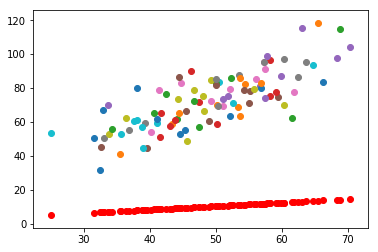

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.004727756899934728, m = 0.23947029204060782, error = 3942.313285106377


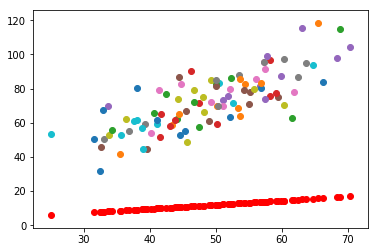

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.005337819444626359, m = 0.27035638024308833, error = 3753.826859849784


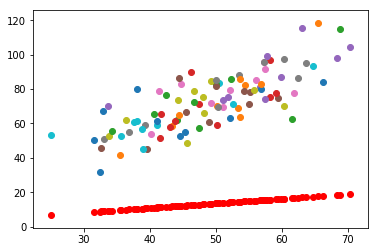

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.005932754572166255, m = 0.3004728092991163, error = 3574.617265282426


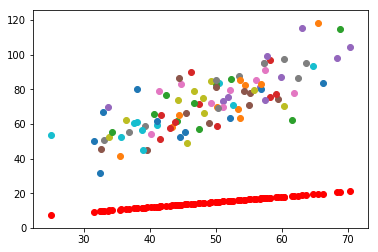

In [66]:
learning_rate = 0.000005
for num in range(0,10):
    runbad(num,learning_rate)
    plt.show()